In [75]:
import os

In [76]:
os.getcwd()

'C:\\Users\\Fuzzy\\Desktop\\Python'

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [78]:
df= pd.read_csv('Football_Data_final.csv')

In [79]:
df.head()

,TEAM,PTS,W,D,L,GF,GA,SAVES,CLEAN SHEET,CK goals against,SHOTS ON TARGET,PASSES COMPLETED,Cross Passes,Tkl+Int,BLOCKS,Defensive Error,Posession PERC,LOOSE BALLS RECOVER,AERIAL DUEL WON PERC
0,Arsenal,69,22,3,13,61,48,100,13,3,186,16176,633,836,386,20,52.8,1861,44.7
1,Aston Villa,45,13,6,19,52,54,96,11,5,159,12748,670,974,453,13,46.5,1850,49.0
2,Brentford,46,13,7,18,48,56,125,9,8,141,11676,640,1000,383,7,44.8,2061,49.6
3,Brighton,51,12,15,11,42,44,102,11,6,141,16410,728,1026,480,12,54.4,2154,53.3
4,Burnley,35,7,14,17,34,53,127,9,7,119,9453,747,1000,509,18,40.2,2027,53.0


### Exploratory Data Analysis

### Dropping Team and position columns

In [80]:
df=df.drop(['TEAM'],axis=1)

In [81]:
df.head()

,PTS,W,D,L,GF,GA,SAVES,CLEAN SHEET,CK goals against,SHOTS ON TARGET,PASSES COMPLETED,Cross Passes,Tkl+Int,BLOCKS,Defensive Error,Posession PERC,LOOSE BALLS RECOVER,AERIAL DUEL WON PERC
0,69,22,3,13,61,48,100,13,3,186,16176,633,836,386,20,52.8,1861,44.7
1,45,13,6,19,52,54,96,11,5,159,12748,670,974,453,13,46.5,1850,49.0
2,46,13,7,18,48,56,125,9,8,141,11676,640,1000,383,7,44.8,2061,49.6
3,51,12,15,11,42,44,102,11,6,141,16410,728,1026,480,12,54.4,2154,53.3
4,35,7,14,17,34,53,127,9,7,119,9453,747,1000,509,18,40.2,2027,53.0


### Applying Train Test split

In [82]:
X=df[['W','D','L','GF','GA','SAVES','CLEAN SHEET','CK goals against','SHOTS ON TARGET','PASSES COMPLETED','Cross Passes','Tkl+Int','BLOCKS','Defensive Error','Posession PERC','LOOSE BALLS RECOVER','AERIAL DUEL WON PERC']]

In [83]:
y=df[['PTS']]

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### VIF 1

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [117]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [118]:
print(vif_data.sort_values(by=['VIF'],ascending=False))


            feature        VIF
2    Posession PERC  11.254467
1   Defensive Error  10.199466
0  CK goals against   4.671027


### VIF 2

In [152]:
X=df[['CLEAN SHEET','CK goals against','Defensive Error']]

In [153]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [154]:
print(vif_data.sort_values(by=['VIF'],ascending=False))


            feature       VIF
2   Defensive Error  6.720166
0       CLEAN SHEET  4.581806
1  CK goals against  4.112358


### Assumptions

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Linear Regression

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
from sklearn.metrics import r2_score

In [158]:
lr=LinearRegression()

In [159]:
lr.fit(X_train,y_train)

LinearRegression()

In [160]:
print(lr.coef_)


[[ 3.78316227 -0.49794431  0.4038683 ]]


In [161]:
print(lr.intercept_)


[8.67463537]


In [162]:
pd.DataFrame(lr.coef_, X.columns, columns = ['Coeff'])

ValueError: Shape of passed values is (1, 3), indices imply (3, 1)

In [97]:
lr.


AttributeError: 'LinearRegression' object has no attribute 'summary'

In [163]:
y_pred=lr.predict(X_test)

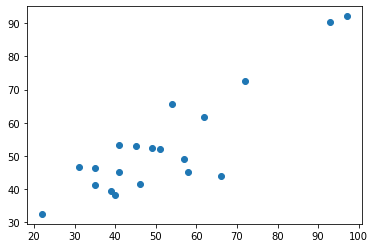

In [164]:
plt.scatter(y_test, y_pred)


(array([2., 3., 2., 4., 4., 2., 1., 1., 0., 1.]),
 array([-15.65546259, -11.87949165,  -8.10352071,  -4.32754977,
         -0.55157883,   3.22439211,   7.00036305,  10.77633399,
         14.55230493,  18.32827587,  22.10424681]),
 <BarContainer object of 10 artists>)

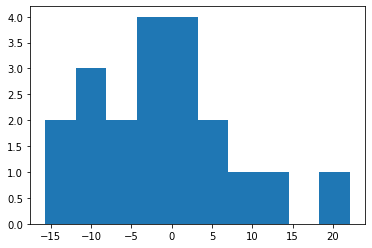

In [165]:
plt.hist(y_test - y_pred)


In [166]:
r2_score(y_test,y_pred)

0.760692572481293

In [167]:
from sklearn import metrics


### Mean Absolute Error (MAE)



In [50]:
Root Mean Squared Error (RMSE)


2.009392049852517

### Root Mean Squared Error (RMSE)


In [168]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


9.174247398702764

In [ ]:
MAPE

In [169]:
np.mean((np.abs(y_test-y_pred)/y_test)*100)

C:\Users\Fuzzy\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


PTS    16.588421
dtype: float64